# Projeto de Teoria dos Grafos

### Parte 01 - Entrada de Arquivo

https://www.freecodecamp.org/news/with-open-in-python-with-statement-syntax-example/

https://pythonhoje.wordpress.com/2018/02/12/python-3-files/

https://www.w3schools.com/python/ref_file_readline.asp


In [1]:
def ler_grafo_txt(nome_arquivo):
    grafo = {"vertices": [], "arestas": []}

    with open(nome_arquivo, 'r') as arquivo:
        tipo_grafo = arquivo.readline().strip() #lendo tipo de grafo D ou ND


        for linha in arquivo: #lendo demais linhas pra guardar arestas e vertices
            u, v = linha.strip().split(',') 
            grafo["vertices"].extend([u, v])
            grafo["arestas"].append((u, v))


#     grafo["vertices"] = list(set(grafo["vertices"])) # excluindo vertices duplicados
    grafo["vertices"] = sorted(list(set(grafo["vertices"])))

    print("Grafo:", grafo)
    print("Tipo de Grafo:", tipo_grafo)
    
    return grafo, tipo_grafo

### Parte 01 - Armazenamento na estrutura de dados

Conceitos: https://algoritmosempython.com.br/cursos/algoritmos-python/algoritmos-grafos/representacao-grafos/


Códigos: https://github.com/professordouglasmaioli/Aulas_de_Grafos/blob/main/Matriz_Adjacencias.py]

In [2]:
def matriz_adjacencia(grafo, tipo_grafo):
    num_vertices = len(grafo["vertices"])
    matriz = [[0] * num_vertices for _ in range(num_vertices)]

    for aresta in grafo["arestas"]:
    #     print("\nARESTA: ", aresta)
        u_idx = grafo["vertices"].index(aresta[0])
        v_idx = grafo["vertices"].index(aresta[1])
    #     print("u_idx: ", u_idx)
    #     print("v_idx: ", v_idx)

        #D uma das posições recebe 1
        if tipo_grafo == "D":
            matriz[u_idx][v_idx] = 1
        #ND cria uma matriz simétrica
        elif tipo_grafo == "ND":
            matriz[u_idx][v_idx] = 1
            matriz[v_idx][u_idx] = 1
            
    return matriz

In [43]:
nome_arquivo = "grafoA.txt" 
grafo, tipo_grafo = ler_grafo_txt(nome_arquivo)
matriz_adj = matriz_adjacencia(grafo, tipo_grafo)

Grafo: {'vertices': ['A', 'B', 'C', 'D', 'E'], 'arestas': [('A', 'B'), ('B', 'C'), ('C', 'D'), ('E', 'B'), ('C', 'A')]}
Tipo de Grafo: D


In [44]:
matriz_adj

[[0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0]]

### Parte 01 - Apresentar se dois vértices vX e vY são ou não adjacentes

In [ ]:
def input_vertice(mensagem):
    vertice = input(mensagem)
    return vertice

In [ ]:
def verifica_adjacentes(matriz_adj, tipo_grafo):
    men_u = 'Digite o primeiro vértice: '
    men_v = 'Digite o segundo vértice: '
    vertices = grafo["vertices"]
    
    while True:
        u = input_vertice(men_u)
        if u in vertices:
            break
        else:
            print("Vértice inválido. \nPor favor, digite um dos seguites vértices: ", vertices)
    
    while True:
        v = input_vertice(men_v)
        if v in vertices:
            break
        else:
            print("Vértice inválido. \nPor favor, digite um dos seguites vértices: ", vertices)
    u_idx = grafo["vertices"].index(u)
    v_idx = grafo["vertices"].index(v)
    
    if tipo_grafo == "D":
        if (matriz_adj[u_idx][v_idx] == 1):
            print('O vértice', u, 'é adjacente de', v)
        else:
            print('O vértice', u, 'não é adjacente de ', v)
#         return matriz_adj[u_idx][v_idx] == 1
    elif tipo_grafo == "ND":
        if (matriz_adj[u_idx][v_idx] == 1 or matriz_adj[v_idx][u_idx] == 1):
            print('Os vértices', u, 'e', v, 'são adjacentes')
        else:
            print('O vértices', u, 'e', v, 'não são adjacentes')
#         return matriz_adj[u_idx][v_idx] == 1 or matriz_adj[v_idx][u_idx] == 1

In [ ]:
# def verifica_adjacentes(matriz, u, v, tipo_grafo):
# #     men_u = 'Digite o primeiro vértice: '
# #     men_v = 'Digite o segundo vértice: '
    
#     vertices = grafo["vertices"]
    
#     while True:
#         u = input_vertice(men_u)
#         if u in vertices:
#             break
#         else:
#             print("Vértice inválido. \nPor favor, digite um dos seguites vértices: ", vertices)
    
#     while True:
#         v = input_vertice(men_v)
#         if v in vertices:
#             break
#         else:
#             print("Vértice inválido. \nPor favor, digite um dos seguites vértices: ", vertices)
    
#     u_idx = grafo["vertices"].index(u)
#     v_idx = grafo["vertices"].index(v)
    
#     if tipo_grafo == "D":
#         return matriz[u_idx][v_idx] == 1
#     elif tipo_grafo == "ND":
#         return matriz[u_idx][v_idx] == 1 or matriz[v_idx][u_idx] == 1


In [ ]:
matriz_adj

In [ ]:
verifica_adjacentes(matriz_adj, tipo_grafo)

### Parte 01 - Calcular o grau de um vértice qualquer

In [ ]:
def calcular_grau(matriz_adj, tipo_grafo):
    men_u = 'Digite um vértice do grafo: '
    vertices = grafo["vertices"]
    
    while True:
        u = input_vertice(men_u)
        if u in vertices:
            break
        else:
            print("Vértice inválido. \nPor favor, digite um dos seguites vértices: ", vertices)
    
    u_idx = grafo["vertices"].index(u)        
    grau = sum(matriz_adj[u_idx])
    
    if tipo_grafo == "ND":
        grau += matriz_adj[u_idx][u_idx]  # Se for não direcionado, conta o loop do vértice
    return grau

In [ ]:
matriz_adj

In [ ]:
print("Grau de vértice:", calcular_grau(matriz_adj, tipo_grafo))

### Parte 01 - Buscar todos os vizinhos de vértice qualquer

In [ ]:
def verifica_vizinhos(matriz_adj, tipo_grafo):
    men_u = 'Digite um vértice do grafo: '
    vertices = grafo["vertices"]
    
    while True:
        u = input_vertice(men_u)
        if u in vertices:
            break
        else:
            print("Vértice inválido. \nPor favor, digite um dos seguites vértices: ", vertices)
    
    u_idx = grafo["vertices"].index(u)
    vizinhos = []

    # coloca vizinhos (linha da matriz_adj)
    for i in range(len(matriz_adj[u_idx])):
        if matriz_adj[u_idx][i] == 1 and grafo["vertices"][i] not in vizinhos:
            vizinhos.append(grafo["vertices"][i])

    # coloca vizinhos (coluna da matriz_adj) nos grafos não direcionado
    if tipo_grafo == "ND": 
        for i in range(len(matriz_adj)):
            if matriz_adj[i][u_idx] == 1 and grafo["vertices"][i] not in vizinhos:
                vizinhos.append(grafo["vertices"][i])
                
    return vizinhos

In [ ]:
matriz_adj

In [ ]:
print("Vizinhos de vértice:", verifica_vizinhos(matriz_adj, tipo_grafo)) 

### Parte 01 - Visitar todas as arestas do grafo

In [5]:
def visitar_arestas(grafo, tipo_grafo):
    num_vertices = len(grafo["vertices"])
    matriz = matriz_adj
    visitadas = set()
    arestas_visitadas = []

    for i in range(num_vertices):
        for j in range(num_vertices):
            # Se a aresta não foi visitada e há uma conexão entre os vértices i e j
            if (i, j) not in visitadas and matriz[i][j] == 1:
                if tipo_grafo == "D" or (tipo_grafo == "ND" and j >= i):
                    arestas_visitadas.append((grafo["vertices"][i], grafo["vertices"][j]))
                    visitadas.add((i, j))
                    if tipo_grafo == "ND":
                        visitadas.add((j, i))

    return arestas_visitadas

In [6]:
arestas_visitadas = visitar_arestas(grafo, tipo_grafo)
print("Arestas do grafo visitadas: ", arestas_visitadas)

Arestas do grafo visitadas:  [('A', 'B'), ('B', 'C'), ('C', 'D'), ('E', 'B')]


In [7]:
matriz_adj

[[0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0]]

### Parte 01 - Aplicação em Busca

In [55]:
def dfs(grafo, visitados, vertice, componente, tipo_grafo):
    visitados[vertice] = True
    
    if tipo_grafo == 'ND':
#         componente.append(vertice)
        for vizinho in range(len(grafo)):
            if grafo[vertice][vizinho] == 1 and not visitados[vizinho]:
                dfs(grafo, visitados, vizinho, componente, tipo_grafo)
        componente.append(vertice)
    else: 
        for vizinho in range(len(grafo)):
            if grafo[vertice][vizinho] == 1 and not visitados[vizinho]:
                dfs(grafo, visitados, vizinho, componente, tipo_grafo)

        componente.append(vertice)

def encontrar_ordem_vertices(grafo):
    visitados = [False] * len(grafo)
    ordem = []
    
    for vertice in range(len(grafo)):
        if not visitados[vertice]:
            componente = []  # Definindo a lista componente aqui
            dfs(grafo, visitados, vertice, componente, tipo_grafo)
            ordem.extend(componente)  # Estendendo a ordem com os vértices da componente
            
    return ordem

def encontrar_componentes_conexos_nao_direcionados(grafo):
    visitados = [False] * len(grafo)
    componentes_conexos = []
    
    for vertice in range(len(grafo)):
        if not visitados[vertice]:
            componente = []
            dfs(grafo, visitados, vertice, componente, tipo_grafo)
#             componente.sort()
            componentes_conexos.append(componente)
#             componentes_conexos.append(sorted(componente))
    
    return componentes_conexos

def encontrar_componentes_fortemente_conexos(grafo):
    visitados = [False] * len(grafo)
    ordem = encontrar_ordem_vertices(grafo)
    grafo_transposto = [[grafo[j][i] for j in range(len(grafo))] for i in range(len(grafo))]
    componentes_conexos = []
    
    for vertice in reversed(ordem):
        if not visitados[vertice]:
            componente = []
            dfs(grafo_transposto, visitados, vertice, componente, tipo_grafo)  # Passando o grafo transposto aqui
#             componente.sort()
            componentes_conexos.append(componente)
#             componentes_conexos.append(sorted(componente))
    
    return componentes_conexos

def encontrar_e_imprimir_componentes(grafo, tipo_grafo):
    if tipo_grafo == "ND":
        componentes_nao_direcionados = encontrar_componentes_conexos_nao_direcionados(grafo)
        print("Componentes Conexos em Grafo Não Direcionado:", componentes_nao_direcionados)
    elif tipo_grafo == "D":
        componentes_fortemente_conexos = encontrar_componentes_fortemente_conexos(grafo)
        print("Componentes Fortemente Conexos em Grafo Direcionado:", componentes_fortemente_conexos)

In [33]:
matriz_adj

[[0, 1, 0, 0, 1, 0, 0],
 [1, 0, 1, 1, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 0]]

In [56]:
encontrar_e_imprimir_componentes(matriz_adj, tipo_grafo)

Componentes Fortemente Conexos em Grafo Direcionado: [[4], [1, 2, 0], [3]]


### Parte 02 - Leitura de um novo arquivo de texto gerado a partir do grafo armazenado

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
def criar_arquivo_grafo(grafo, tipo_grafo):
    matriz = matriz_adj
    arestas = visitar_arestas(grafo, tipo_grafo) 
   
    with open("grafo_info.txt", "w") as f:
        for aresta in arestas:
            f.write(f"{aresta[0]} {aresta[1]}\n")

In [10]:
def visualizar_grafo(tipo_grafo):
    if tipo_grafo == 'ND':
        G = nx.read_edgelist("grafo_info.txt", create_using=nx.Graph())
    else:
        G = nx.read_edgelist("grafo_info.txt", create_using=nx.DiGraph())
    nx.draw(G, with_labels=True, node_color="skyblue", node_size=1500, font_size=12, font_weight="bold", arrows=True)
    plt.show()

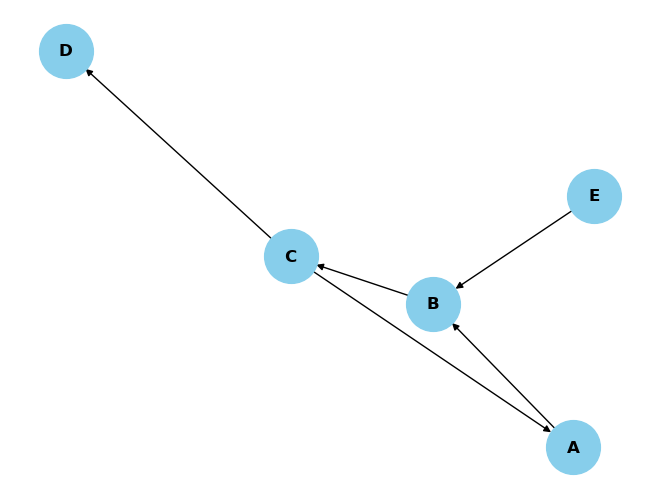

In [45]:
criar_arquivo_grafo(grafo, tipo_grafo)
visualizar_grafo(tipo_grafo)

In [ ]:
matriz_adj

### Parte 02 - Relatório